In [27]:
import pandas as pd
import datetime
import numpy as np

data = pd.read_csv('../Stocks/goog.us.txt')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "   Std: ", np.std(data['Open']),  "   Max: ", np.max(data['Open']),  "   Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "   Std: ", np.std(data['High']),  "   Max: ", np.max(data['High']),  "   Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "   Std: ", np.std(data['Low']),   "   Max: ", np.max(data['Low']),   "   Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "   Std: ", np.std(data['Close']), "   Max: ", np.max(data['Close']), "   Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"   Std: ", np.std(data['Volume']),"   Max: ", np.max(data['Volume']),"   Min: ", np.min(data['Volume']))


         Date    Open    High     Low   Close  Volume  OpenInt
0  2014-03-27  568.00  568.00  552.92  558.46   13052        0
1  2014-03-28  561.20  566.43  558.67  559.99   41003        0
2  2014-03-31  566.89  567.00  556.93  556.97   10772        0
3  2014-04-01  558.71  568.45  558.71  567.16    7932        0
4  2014-04-02  599.99  604.83  562.19  567.00  146697        0


Open   --- mean : 702.8957565502183    Std:  144.06380765138775    Max:  1033.99    Min:  494.65
High   --- mean : 708.1148307860253    Std:  144.6186528394033    Max:  1048.39    Min:  495.98
Low    --- mean : 697.0583111353716    Std:  143.8096452218502    Max:  1028.45    Min:  487.56
Close  --- mean : 702.8122587336239    Std:  144.4181038428079    Max:  1039.85    Min:  492.55
Volume --- mean : 1725987.538209607    Std:  953551.2875822282    Max:  11164900    Min:  7932


In [28]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item     Open    Close   Volume
0     0  1026.46  1028.07   720674
1     1  1033.99  1031.05  1244886
2     2  1030.52  1039.85  1088395
3     3  1027.27  1033.33  1112146
4     4  1028.99  1025.90  1124765
---
     Item    Open   Close  Volume
911   911  599.99  567.00  146697
912   912  558.71  567.16    7932
913   913  566.89  556.97   10772
914   914  561.20  559.99   41003
915   915  568.00  558.46   13052


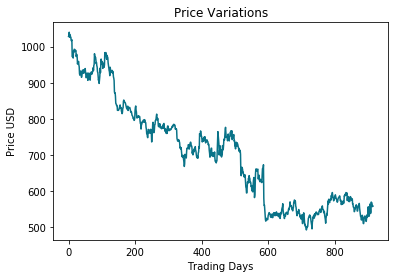

In [29]:
import visualize

visualize.plot_basic(stocks)

In [30]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "   Std: ", np.std(stocks['Open']),  "   Max: ", np.max(stocks['Open']),  "   Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "   Std: ", np.std(stocks['Close']), "   Max: ", np.max(stocks['Close']), "   Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"   Std: ", np.std(stocks['Volume']),"   Max: ", np.max(stocks['Volume']),"   Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.986038  0.978476  0.063883
1     1  1.000000  0.983921  0.110868
2     2  0.993566  1.000000  0.096842
3     3  0.987540  0.988087  0.098971
4     4  0.990729  0.974511  0.100102


Open   --- mean : 0.3861122048248202    Std:  0.26711129834869973    Max:  1.0    Min:  0.0
Close  --- mean : 0.3841809953108428    Std:  0.26387375085475584    Max:  0.9999999999999999    Min:  0.0
Volume --- mean : 0.1539894654362733    Std:  0.08546688379694446    Max:  1.0000000000000002    Min:  0.0


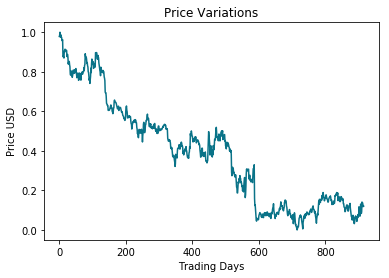

In [31]:
visualize.plot_basic(stocks)
stocks.to_csv("company_preprocessed_data.csv", index = False)

In [32]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('company_preprocessed_data.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.986038,0.978476,0.063883
1,1,1.000000,0.983921,0.110868
2,2,0.993566,1.000000,0.096842
3,3,0.987540,0.988087,0.098971
4,4,0.990729,0.974511,0.100102


In [33]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (628, 1)
y_train (628, 1)
x_test (288, 1)
y_test (288, 1)


In [34]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [35]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

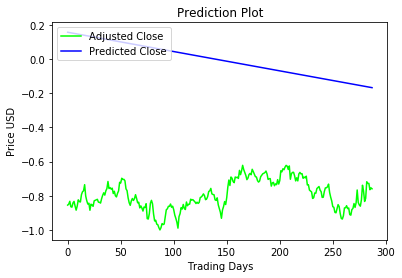

In [36]:
vs.plot_prediction(y_test,predictions)

In [37]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7893 MSE (0.8884 RMSE)
Test Score: 0.64501298 MSE (0.80312700 RMSE)


In [38]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('company_preprocessed_data.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.986038,0.978476,0.063883
1,1.000000,0.983921,0.110868
2,0.993566,1.000000,0.096842
3,0.987540,0.988087,0.098971
4,0.990729,0.974511,0.100102


In [39]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (360, 50, 3)
y_train (360,)
x_test (446, 50, 3)
y_test (446,)


In [40]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.03640866279602051


In [41]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

Train on 342 samples, validate on 18 samples
Epoch 1/1
342/342 [==============================] - 3s 8ms/step - loss: 0.1415 - val_loss: 0.0044


In [44]:
predictions = model.predict(X_test)

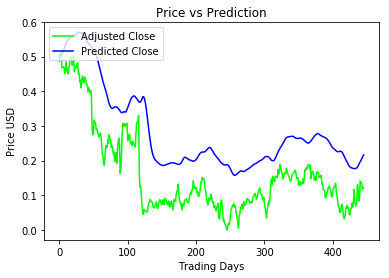

In [45]:
vs.plot_lstm_prediction(y_test,predictions)

In [46]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00915071 MSE (0.09565934 RMSE)
Test Score: 0.01700517 MSE (0.13040388 RMSE)


In [47]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.030879497528076172


In [48]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Train on 342 samples, validate on 18 samples
Epoch 1/5
 - 2s - loss: 0.1996 - val_loss: 0.0018
Epoch 2/5
 - 1s - loss: 0.0373 - val_loss: 0.0024
Epoch 3/5
 - 1s - loss: 0.0090 - val_loss: 0.0094
Epoch 4/5
 - 1s - loss: 0.0191 - val_loss: 0.0062
Epoch 5/5
 - 1s - loss: 0.0098 - val_loss: 0.0013


In [49]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

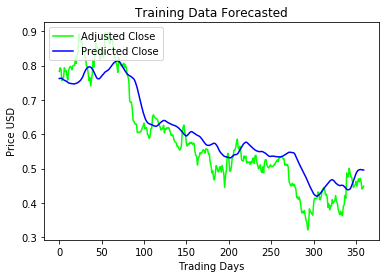

In [50]:
vs.plot_lstm_prediction(y_train, model.predict(X_train, batch_size=batch_size), title = "Training Data Forecasted")

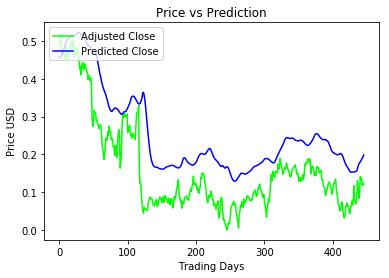

In [51]:
vs.plot_lstm_prediction(y_test,predictions)

In [52]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00322022 MSE (0.05674700 RMSE)
Test Score: 0.01059080 MSE (0.10291163 RMSE)


In [53]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.010591 - RMSE * Adjusted Close Range
